### Resources

* https://dash.plot.ly/getting-started
* https://medium.com/python-pandemonium/data-visualization-in-python-bar-graph-in-matplotlib-f1738602e9c4

In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import os
import glob
import psycopg2
import pandas.io.sql as sqlio
import pandas as pd
import numpy as np
from sql_queries import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
conn = psycopg2.connect("host=127.0.0.1 dbname=sparkifydb user=student password=student")

In [9]:
query = "select * from songplays as sp, time as t where sp.start_time = t.start_time;"
df = sqlio.read_sql_query(query, conn)
list(df)

['songplay_id',
 'start_time',
 'user_id',
 'song_id',
 'artist_id',
 'session_id',
 'location',
 'user_agent',
 'start_time',
 'hour',
 'day',
 'week',
 'month',
 'year',
 'weekday']

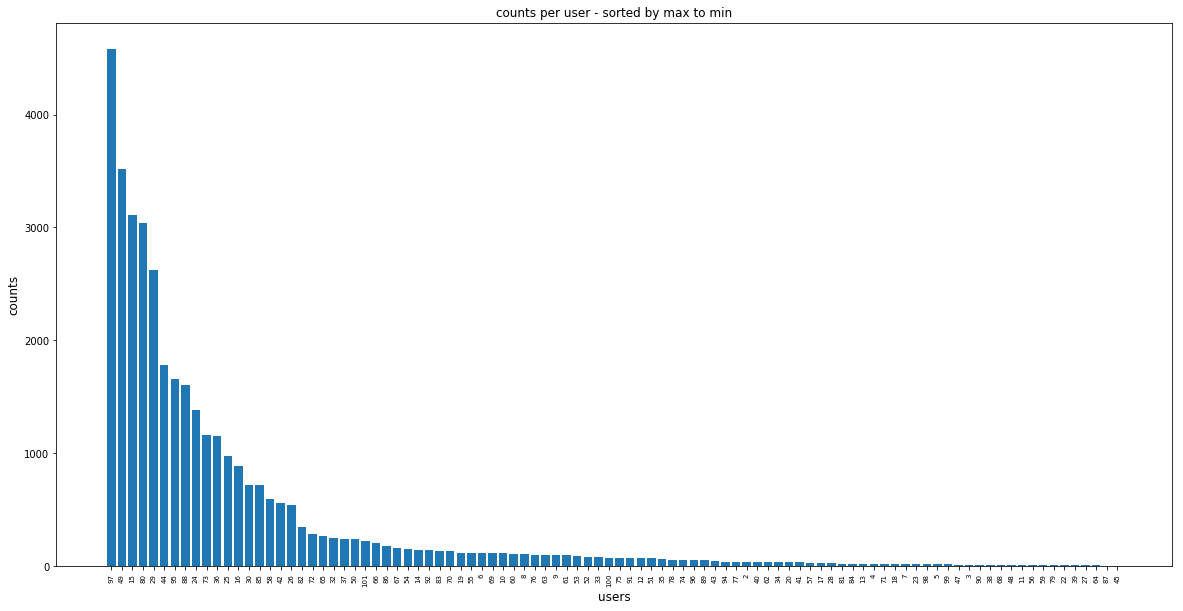

In [19]:
ds = df[['songplay_id','user_id']].groupby('user_id').agg(['count'])
ds.sort_values(by=[('songplay_id', 'count')], ascending=False, inplace=True)

labels = list(ds.index)
data = list(ds[('songplay_id', 'count')])

def plot_bar_x(labels, data):
    # this is for plotting purpose
    index = np.arange(len(labels))
    plt.figure(figsize=(20,10))
    plt.bar(index, data)
    plt.xlabel('users', fontsize=12)
    plt.ylabel('counts', fontsize=12)
    plt.xticks(index, labels, fontsize=7, rotation=90)
    plt.title('counts per user - sorted by max to min')

    plt.show()
    
plot_bar_x(labels, data)

In [11]:
ds2 = df[['songplay_id','user_id']].groupby('user_id').agg(['count'])
ds2 = ds2.sort_values(by=[('songplay_id', 'count')], ascending=False)
x2 = list(ds2.index)
y2 = list(ds2[('songplay_id', 'count')])